Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise05/exercise05.ipynb)

# Exercise 5

## Problem

So far, we've been examining affordable housing in DC with summary tables. Some of you have figured out how to incorporate graphic variables into these tables, using color to highlight minimums and maximums (good Googling!). However, we can often communicate much more convincingly, and even see patterns better ourselves, by making charts.

For this week's exercise, please:

- Write a function that makes a plot communicating a valuable statistic about affordable housing in each ward. You get to choose what's most valuable to show.
- The function should take an argument to filter by project status so it can be used to generate a plot representing projects that are either completed, under construction, or in the pipeline. (The same generalized function should be able to represent projects with any status.)
    - Optional: Can you specify the argument so it's also easy to see data for projects with all three statuses at once?
    - Optional: The function may also take additional arguments for whatever customization you think would be valuable for an end-user.
- The function should be stored in a module, loaded into a notebook, and called at least once in the notebook to demonstrate it.
- Please make a pull request with a folder containing your module (`.py` file), notebook (`.ipynb` file), any CSV files your analysis depends on, and any additional graphics files.

Bonus: Make it even better by exporting one plot to Illustrator or another software and fine-tuning it. Then include it in your PR folder and use markdown to show the resulting graphic in your notebook. (Hint: I demonstrate how to do this with markdown in the demo05 notebook.)

## Data

CSVs for the affordable housing dataset and ward census data are included on GitHub at `exercises/exercise05`. Please feel free to draw on other datasets, though this is not required. If you do use other data, please cite them, preferably with links, with markdown in your notebook or through comments in your code.


In [1]:

#Mount to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [19]:
# Import dependencies
import os
import pandas as pd

# Set working directory
wd_path = '/content/drive/MyDrive/Amanguah/URSP668Y_Data_Science/Amanguah_Exercise_folder'
df_affordable = pd.read_csv('affordable_housing.csv')

# Find its location in the dataframe
idx = df_affordable[df_affordable['MAR_WARD'] == '1'].index[0]
print(f'inconsistent ward label is at index {idx}')
df_affordable.at[220, 'MAR_WARD'] = 'Ward 1'
df_affordable.head(2)

inconsistent ward label is at index 220


,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,...,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,MAR_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
0,-77.009383,38.910255,89281,Ward 6,"1520 North Capitol Street Northwest, Washingto...",Cycle House,Under Construction,DMPED DHCD,18,38.910248,...,4,12,0,0,NaN,331764,399186.36,138042.91,1520 NORTH CAPITOL STREET NW,2024/02/05 05:00:27+00
1,-77.009436,38.906403,89282,Ward 6,"1200 North Capitol Street Northwest, Washingto...",Tyler House Apartments,Completed 2015 to Date,DCHFA,284,38.906396,...,0,284,0,0,NaN,237128,399181.75,137615.28,1200 NORTH CAPITOL STREET NW,2024/02/05 05:00:27+00


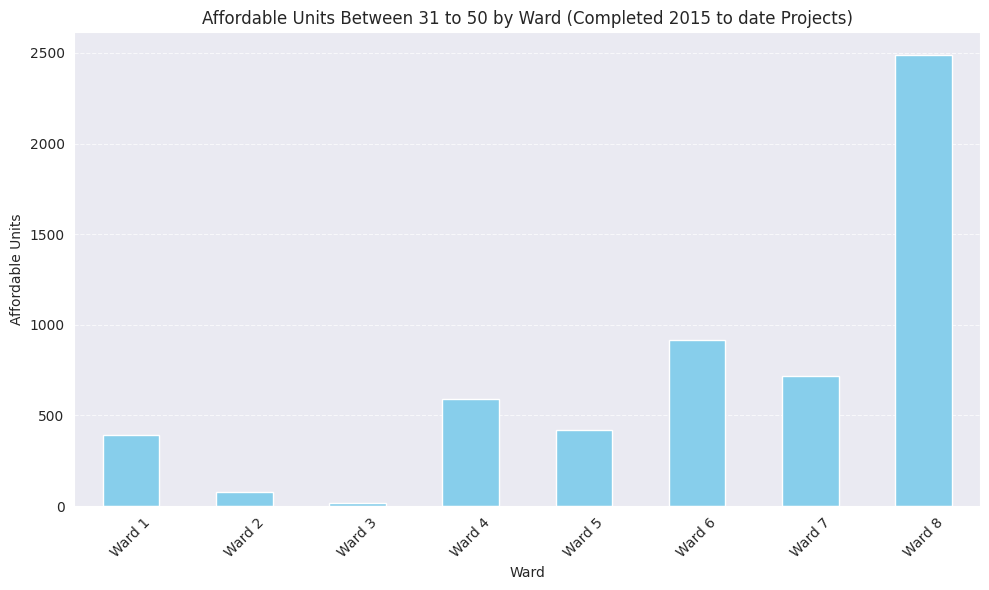

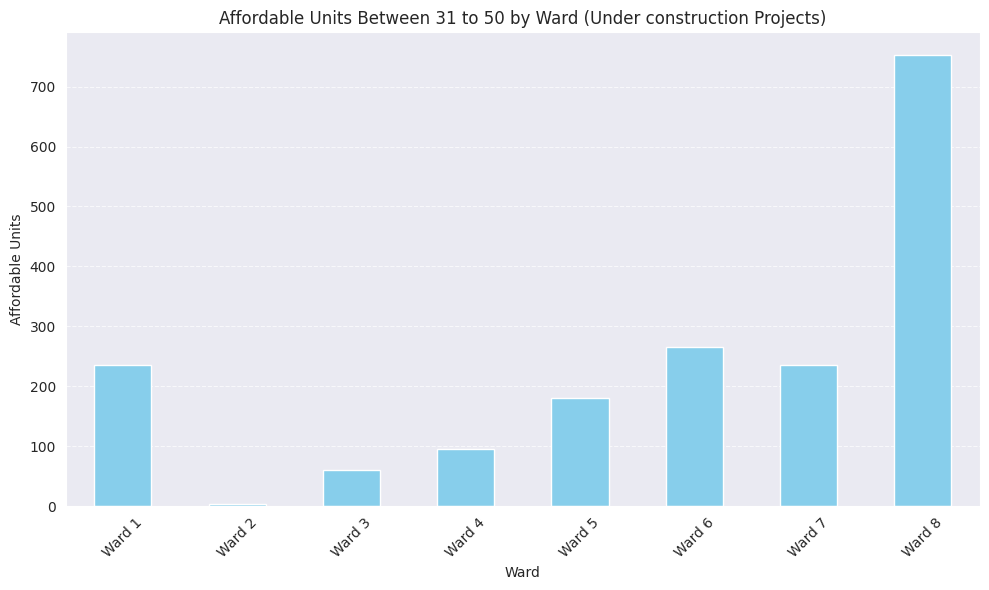

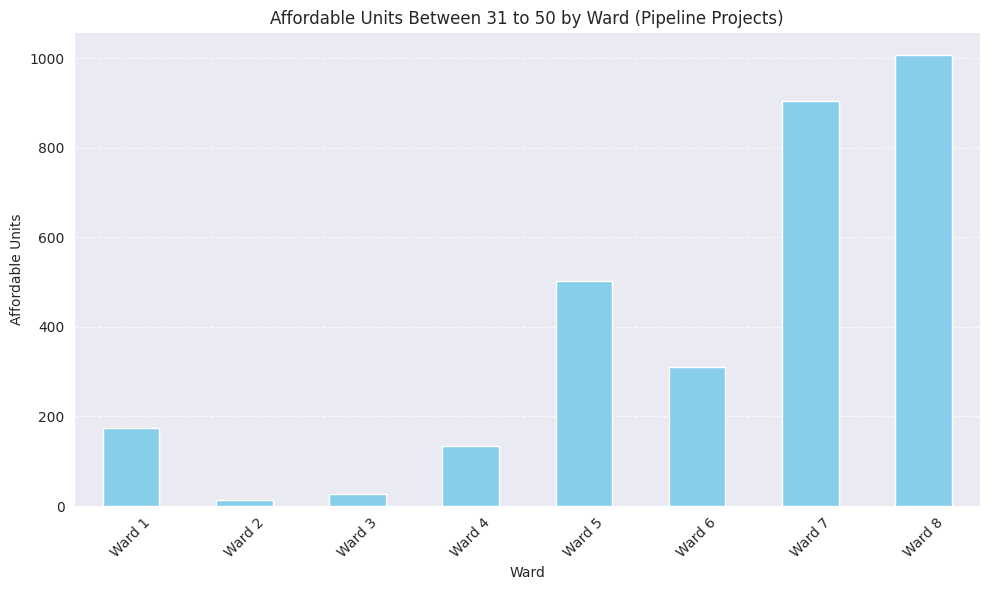

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

def plot_affordable_housing_statistic(df_affordable, status='all', figsize=(10, 6), color='skyblue', rotation=45, grid=True):
    if status == 'all':
        filtered_df_affordable = df_affordable
        status_label = 'All Statuses'
    else:
        filtered_df_affordable = df_affordable[df_affordable['STATUS_PUBLIC'] == status]
        status_label = status.capitalize()

    if filtered_df_affordable.empty:
        print(f"No {status_label} projects found.")
        return

    ward_groups = filtered_df_affordable.groupby('MAR_WARD')['AFFORDABLE_UNITS_AT_31_50_AMI'].sum()

    plt.figure(figsize=figsize)
    ward_groups.plot(kind='bar', color=color)
    plt.title(f'Affordable Units Between 31 to 50 by Ward ({status_label} Projects)')
    plt.xlabel('Ward')
    plt.ylabel('Affordable Units')
    plt.xticks(rotation=rotation)
    if grid:
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Visualizing the three affordable housing Units for each Status:
#df_affordable = pd.read_csv('affordable_housing.csv')
plot_affordable_housing_statistic(df_affordable, status='Completed 2015 to Date')
plot_affordable_housing_statistic(df_affordable, status='Under Construction')
plot_affordable_housing_statistic(df_affordable, status='Pipeline')



<Figure size 1200x600 with 0 Axes>

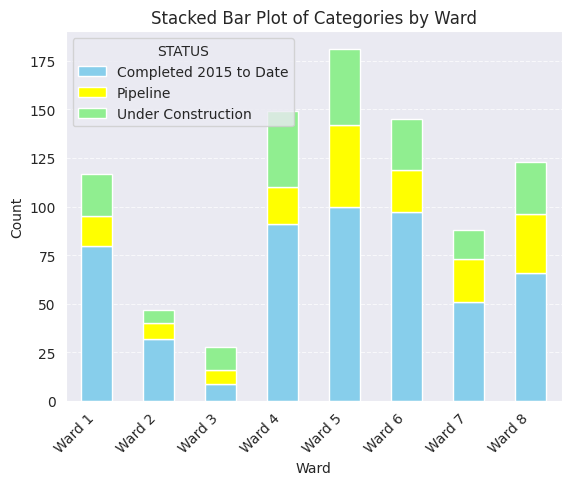

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

def visualize_categories_by_ward(df_affordable):


    # Group the data by WARD and STATUS, then count occurrences
    counts = df_affordable.groupby(['MAR_WARD', 'STATUS_PUBLIC']).size().unstack(fill_value=0)

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 6))
    counts.plot(kind='bar', stacked=True, color=['skyblue', 'yellow', 'lightgreen'])
    plt.title('Stacked Bar Plot of Categories by Ward')
    plt.xlabel('Ward')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='STATUS')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


visualize_categories_by_ward(df_affordable)
